<a href="https://colab.research.google.com/github/EugeneDyachenko/ml-study-digit-recognizer-notebook/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization, Dropout, MaxPooling2D
tf.test.gpu_device_name()

!pwd

/content


In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('train shape is {}'.format(train.shape))
print('valid shape is {}'.format(test.shape))

train shape is (42000, 785)
valid shape is (28000, 784)


In [68]:
image_size_2D = 28
image_size_1D = image_size_2D * image_size_2D

train_values = train.to_numpy()

X_valid = test.to_numpy()

X_all = train_values[:, 1:]
Y_all = keras.utils.to_categorical(train_values[:, 0], num_classes=10)

X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.1)

print('Number of classes {}'.format(Y_train.shape[1]))
print('Number of train examples {}'.format(X_train.shape[0]))
print('Number of test exapmples {}'.format(X_test.shape[0]))

Number of classes 10
Number of train examples 37800
Number of test exapmples 4200


In [45]:
image_to_3D = lambda image: image.reshape(-1, image_size_2D, image_size_2D, 1)

In [46]:
# train 0.8959
# kaggle score 0.88900
def get_simple_model():
  model = keras.Sequential()

  model.add(Dense(units=10, activation='softmax', name='layer_1', input_shape=(image_size_1D, )))

  return model


get_simple_model().summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [47]:
# batch=128, rate=0.05
# train 0.9879 batch=128, rate=0.05
# kaggle score 0.97196
def get_cnn_model_v1():
  model = keras.Sequential()
  
  model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_1', input_shape=(image_size_2D, image_size_2D, 1)))
  model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', name='conv_2'))
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name='conv_3'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv_4'))

  model.add(Flatten(name='flatten'))
  model.add(Dense(units=10, activation='softmax', name='dense_5'))

  return model


get_cnn_model_v1().summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 16)        1168      
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 32)        4640      
_________________________________________________________________
conv_4 (Conv2D)              (None, 20, 20, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                256010    
Total params: 280,394
Trainable params: 280,394
Non-trainable params: 0
_______________________________________________

In [48]:
# TODO: move to func, names
# train 
# test 
# batch=128, epochs=100, rate=0.1
def get_cnn_model_v2():
  model = keras.Sequential()

  model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv_1_1', input_shape=(image_size_2D, image_size_2D, 1)))
  model.add(BatchNormalization(name='normalization_1_1'))
  model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv_1_2'))
  model.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
  model.add(BatchNormalization(name='normalization_1_2'))
  model.add(Dropout(0.7, name='dropout_1'))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv_2_1'))
  model.add(BatchNormalization(name='normalization_2_1'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv_2_2'))
  model.add(BatchNormalization(name='normalization_2_2'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv_2_3'))
  model.add(BatchNormalization(name='normalization_2_3'))
  model.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
  model.add(Dropout(0.5, name='dropout_2'))

  model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv_3_1'))
  model.add(BatchNormalization(name='normalization_3_1'))
  model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv_3_2'))
  model.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
  model.add(BatchNormalization(name='normalization_3_2'))
  model.add(Dropout(0.6, name='dropout_3'))

  model.add(Flatten(name='flatten'))
  model.add(Dense(units=128, activation='relu', name='dense_4'))
  model.add(Dropout(0.5, name='dropout_4'))
  model.add(Dense(units=10, activation='softmax', name='normalization_4_2'))

  return model

get_cnn_model_v2().summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
normalization_1_1 (BatchNorm (None, 28, 28, 32)        128       
_________________________________________________________________
conv_1_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 14, 14, 32)        0         
_________________________________________________________________
normalization_1_2 (BatchNorm (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2_1 (Conv2D)            (None, 14, 14, 64)      

In [66]:
model = get_cnn_model_v2()
opt = keras.optimizers.Adam(learning_rate=0.005)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [50]:
datagen = ImageDataGenerator(
  rotation_range=15,
  width_shift_range=0.1,
  height_shift_range=0.1,
  zoom_range=0.1,
)
datagen.fit(image_to_3D(X_train))

In [ ]:
history = None
EPOCHS_COUNT = 100

with tf.device('/device:GPU:0'):
  history = model.fit_generator(
      datagen.flow(
        image_to_3D(X_train),
        Y_train,
        batch_size=256
      ),
      epochs=EPOCHS_COUNT,
      validation_data=(image_to_3D(X_test), Y_test),
      verbose=1
  )

Epoch 1/100
148/148 [==============================] - 9s 60ms/step - loss: 1.1453 - accuracy: 0.6139 - val_loss: 2.3047 - val_accuracy: 0.7040
Epoch 2/100
148/148 [==============================] - 9s 59ms/step - loss: 0.3241 - accuracy: 0.9078 - val_loss: 0.2234 - val_accuracy: 0.9498
Epoch 3/100
148/148 [==============================] - 9s 59ms/step - loss: 0.2145 - accuracy: 0.9412 - val_loss: 0.0892 - val_accuracy: 0.9793
Epoch 4/100
148/148 [==============================] - 9s 60ms/step - loss: 0.1773 - accuracy: 0.9518 - val_loss: 0.0840 - val_accuracy: 0.9805
Epoch 5/100
148/148 [==============================] - 9s 59ms/step - loss: 0.1450 - accuracy: 0.9606 - val_loss: 0.0522 - val_accuracy: 0.9874
Epoch 6/100
148/148 [==============================] - 9s 59ms/step - loss: 0.1307 - accuracy: 0.9649 - val_loss: 0.0445 - val_accuracy: 0.9888
Epoch 7/100
148/148 [==============================] - 9s 60ms/step - loss: 0.1155 - accuracy: 0.9691 - val_loss: 0.0554 - val_accuracy:

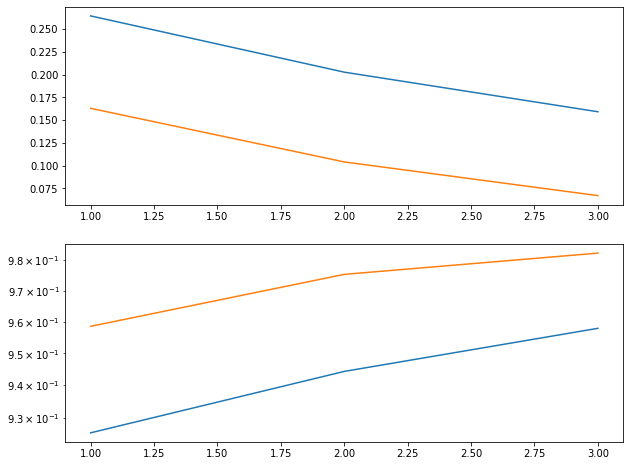

In [65]:
epochs_range = range(1, EPOCHS_COUNT + 1)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, history.history['loss'], scaley='log')
plt.plot(epochs_range, history.history['val_loss'], scaley='log')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, history.history['accuracy'], scaley='log')
plt.plot(epochs_range, history.history['val_accuracy'], scaley='log')

plt.yscale('log')
plt.show()

In [ ]:
with tf.device('/device:GPU:0'):
  # Y_valid = model.predict(X_valid) # For FC model
  Y_valid = model.predict(X_valid.reshape(-1, image_size_2D, image_size_2D, 1))
  tf.argmax(Y_valid, axis=0)
  result = pd.DataFrame({ 'imageId': range(1, Y_valid.shape[0] + 1), 'Label': tf.argmax(Y_valid, axis=1) })
  result.to_csv('result.csv', index=False)